# Task 2

first we read the .csv file and remove the duplicates:

In [2]:
import pandas as pd

df = pd.read_csv('task2.csv')

In [3]:
duplicate_rows = df[df.duplicated()]
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8407 entries, 0 to 8406
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Work_Year         8407 non-null   int64 
 1   Experience_Level  8407 non-null   object
 2   Employment_Type   8407 non-null   object
 3   Job_Title         8407 non-null   object
 4   Salary            8407 non-null   int64 
 5   Salary_Currency   8407 non-null   object
 6   Remote_Ratio      8407 non-null   int64 
 7   Company_Size      8407 non-null   object
dtypes: int64(3), object(5)
memory usage: 525.6+ KB


As you can see on the info, there are 8407 rows in this dataset and 8 columns. None of the columns include missing data or NA. So there is no need to handle that. Next we delete currencies that have lower frequency:

In [5]:
currency_counts = df['Salary_Currency'].value_counts()
print(currency_counts)

Salary_Currency
USD    7499
GBP     410
EUR     339
INR      52
CAD      48
AUD      12
PLN       7
CHF       6
SGD       6
JPY       4
BRL       4
DKK       3
HUF       3
TRY       3
NOK       2
THB       2
ZAR       1
HKD       1
ILS       1
PHP       1
NZD       1
MXN       1
CLP       1
Name: count, dtype: int64


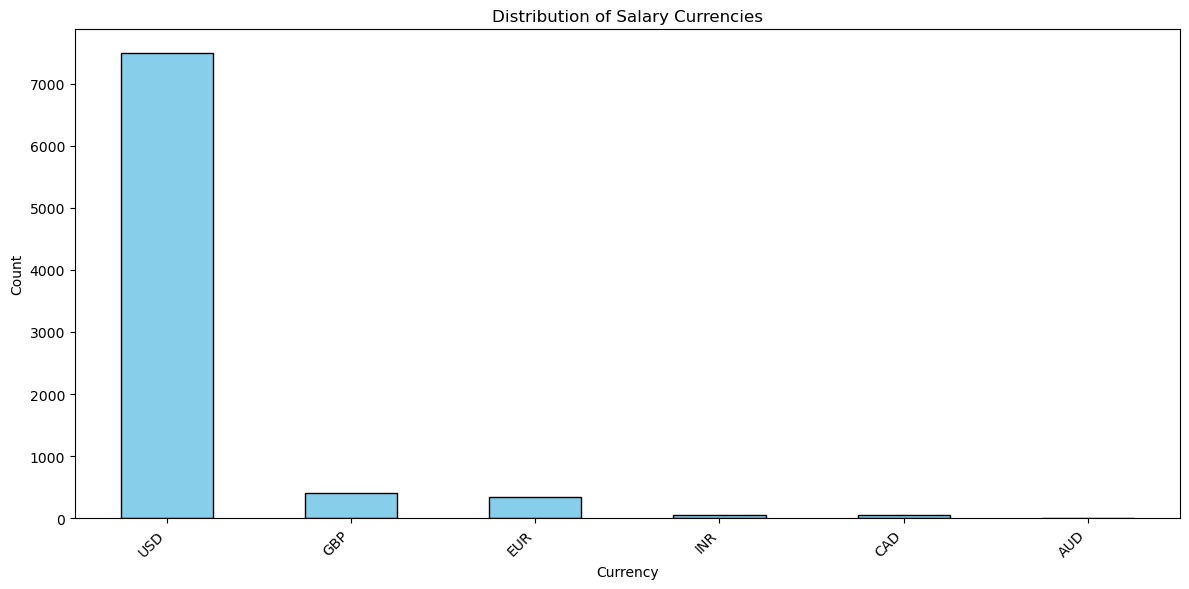

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  
currency_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Salary Currencies")
plt.xlabel("Currency")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


In [6]:
currencies_to_keep = currency_counts[currency_counts >= 10].index.tolist()
df = df[df['Salary_Currency'].isin(currencies_to_keep)]
df = df.reset_index(drop=True)
currency_counts = df['Salary_Currency'].value_counts()
print(currency_counts)

Salary_Currency
USD    7499
GBP     410
EUR     339
INR      52
CAD      48
AUD      12
Name: count, dtype: int64


We used forex_python to convert all the currencies th USD:

In [8]:
pip install forex_python

   ---------------------------------------- 0.0/75.3 kB ? eta -:--:--
   ---------- ----------------------------- 20.5/75.3 kB 682.7 kB/s eta 0:00:01
   ---------------- ----------------------- 30.7/75.3 kB 435.7 kB/s eta 0:00:01
   --------------------- ------------------ 41.0/75.3 kB 326.8 kB/s eta 0:00:01
   ---------------------------------------- 75.3/75.3 kB 417.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
from forex_python.converter import CurrencyRates

c = CurrencyRates()
def convert_to_usd(amount, currency):
    try:
        rate = c.get_rate(currency, 'USD')
        return amount * rate
    except ValueError:
        return 
    
df['Salary_USD'] = df.apply(lambda row: convert_to_usd(row['Salary'], row['Salary_Currency']), axis=1)

In [10]:
df

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size,Salary_USD
0,2024,Senior-Level,Full-Time,AI Engineer,90000,USD,0,Large,90000.000000
1,2024,Senior-Level,Full-Time,Machine Learning Engineer,180500,USD,0,Medium,180500.000000
2,2024,Senior-Level,Full-Time,Machine Learning Engineer,96200,USD,0,Medium,96200.000000
3,2024,Senior-Level,Full-Time,Machine Learning Engineer,235000,USD,0,Medium,235000.000000
4,2024,Senior-Level,Full-Time,Machine Learning Engineer,175000,USD,0,Medium,175000.000000
...,...,...,...,...,...,...,...,...,...
8355,2020,Senior-Level,Full-Time,Data Scientist,412000,USD,100,Large,412000.000000
8356,2021,Mid-Level,Full-Time,Principal Data Scientist,151000,USD,100,Large,151000.000000
8357,2020,Entry-Level,Full-Time,Data Scientist,105000,USD,100,S,105000.000000
8358,2020,Entry-Level,Contract,Business Data Analyst,100000,USD,100,Large,100000.000000


As you can see, we now have a new column in the dataset called Salery_USD which is the new converted salaries.

In [11]:
df['Salary_USD'].describe()

count      8360.000000
mean     147311.232093
std       73103.473506
min       14456.682871
25%       96000.000000
50%      139000.000000
75%      186000.000000
max      800000.000000
Name: Salary_USD, dtype: float64

On the table above, you can see the details of Salary_USD like mean, std, min, max, etc.. Next, We plot the distribution of salary. Since salary is a numerical value, it is better to use hostogram plot.

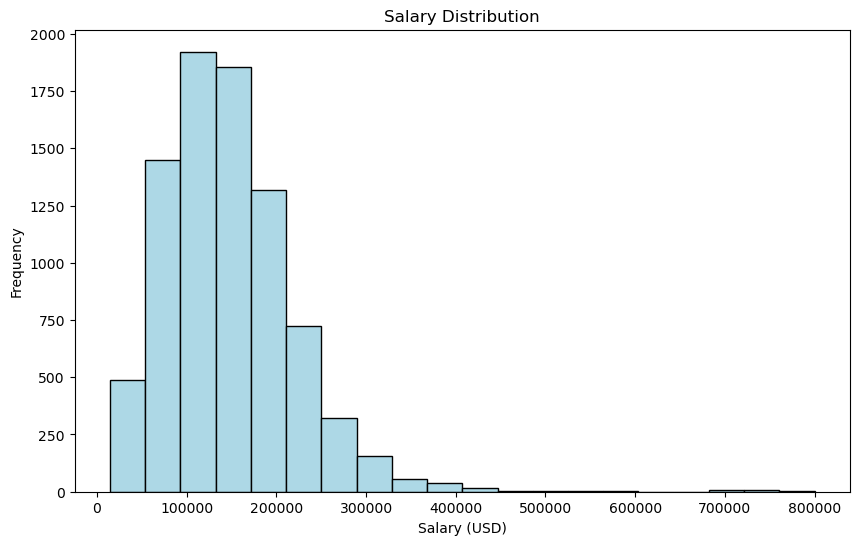

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['Salary_USD'], bins=20, color='lightblue', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

As you can see, salary distribution plot looks like a shifted normal distribution. however, there are some outliers on the right side of the plot which can be seen on "Top 10 Highest Salaries by Job Title" plot. It is also useful to have a box plot to further show the statistical details.

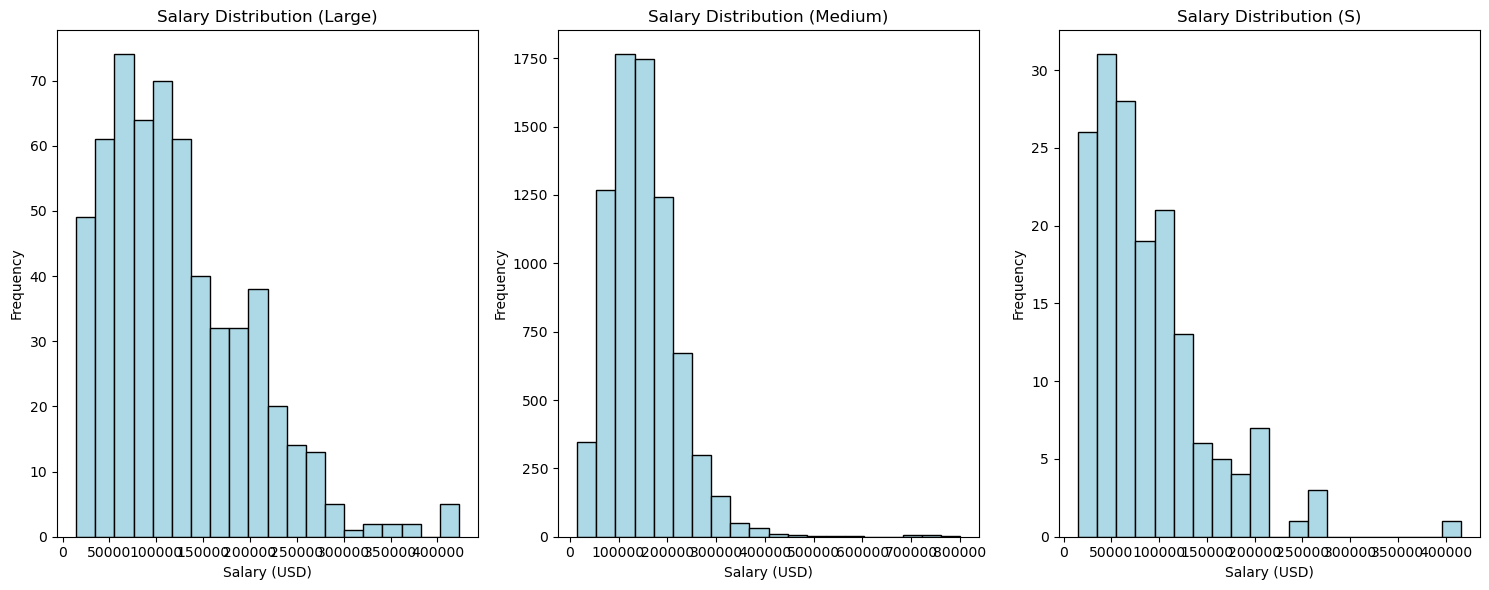

In [35]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

company_sizes = ['Large', 'Medium', 'S']

for i, company_size in enumerate(company_sizes):
   data = df[df['Company_Size'] == company_size]

   axes[i].hist(data['Salary_USD'], bins=20, color='lightblue', edgecolor='black')
   axes[i].set_title(f"Salary Distribution ({company_size})")
   axes[i].set_xlabel('Salary (USD)')
   axes[i].set_ylabel('Frequency')

plt.tight_layout()

plt.show()


The salary distribution for all three company sizes appears to be right-skewed. This means there are more employees who make lower salaries than those who make higher salaries.

The distribution of salaries in large companies appears to have a wider range than the other two distributions. This suggests that there is a greater disparity in salaries among employees in large companies. In other words, there is a larger range between the lowest and highest paid employees in large companies.

The median salary appears to be highest in large companies, followed by medium companies, and then small companies. This means that half of the employees in large companies make more than the median salary, and half make less.

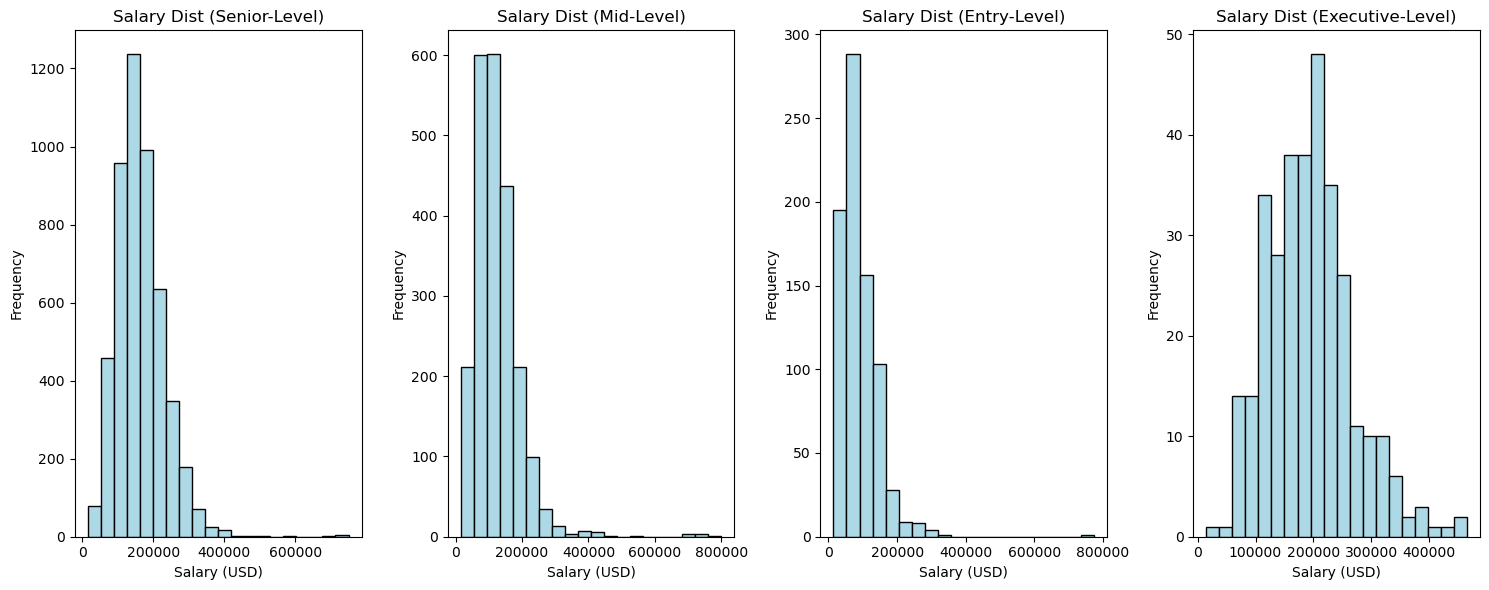

In [39]:
import matplotlib.pyplot as plt

# Get experiment levels (categories)
experiment_levels = df['Experience_Level'].unique().tolist()

# Create a figure with subplots in a 1x(number of experiment levels) grid
fig, axes = plt.subplots(1, len(experiment_levels), figsize=(15, 6))

# Iterate through experiment levels and create a histogram for each
for i, experiment_level in enumerate(experiment_levels):
  # Filter data for the current experiment level
  data = df[df['Experience_Level'] == experiment_level]

  # Create the histogram for the current experiment level
  axes[i].hist(data['Salary_USD'], bins=20, color='lightblue', edgecolor='black')
  axes[i].set_title(f"Salary Dist ({experiment_level})")
  axes[i].set_xlabel('Salary (USD)')
  axes[i].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


The right skewness for Executive-level is less and it is closer to a normal distribution

In [40]:
import pandas as pd

grouped_data = df.groupby('Experience_Level')

mean_salary = grouped_data['Salary_USD'].mean()
median_salary = grouped_data['Salary_USD'].median()

print("Mean Salary (USD) by Experience Level:")
print(mean_salary)
print("\nMedian Salary (USD) by Experience Level:")
print(median_salary)

df['Mean_Salary'] = grouped_data['Salary_USD'].mean()
df['Median_Salary'] = grouped_data['Salary_USD'].median()


Mean Salary (USD) by Experience Level:
Experience_Level
Entry-Level         89839.380165
Executive-Level    193010.498834
Mid-Level          124167.960716
Senior-Level       163781.568157
Name: Salary_USD, dtype: float64

Median Salary (USD) by Experience Level:
Experience_Level
Entry-Level         80000.000000
Executive-Level    188680.567724
Mid-Level          112000.000000
Senior-Level       154600.000000
Name: Salary_USD, dtype: float64


Salary Trends by Experience Level:

Increase with Experience: Both the mean and median salary show a clear upward trend as experience level increases. This indicates that employees generally earn more as they gain experience in their field.

Salary Gap: The difference between the entry-level and executive-level mean salary is over $100,000, highlighting a significant salary gap across experience levels.

Mean vs. Median:

Similar Trends: Both mean and median follow a similar upward trend, suggesting a relatively symmetrical distribution of salaries within each experience level. However, slight differences might exist.
Here's a breakdown by experience level:

Entry-Level: This level has the lowest mean and median salary. It's likely populated by individuals starting their careers.
Mid-Level: Compared to entry-level, both mean and median salary show a significant increase, reflecting the added value of experience.
Senior-Level: This level shows a further increase in both mean and median salary, indicating the value of senior employees with extensive experience.
Executive-Level: This level boasts the highest mean and median salary, suggesting significant compensation for leadership roles and high-level expertise.

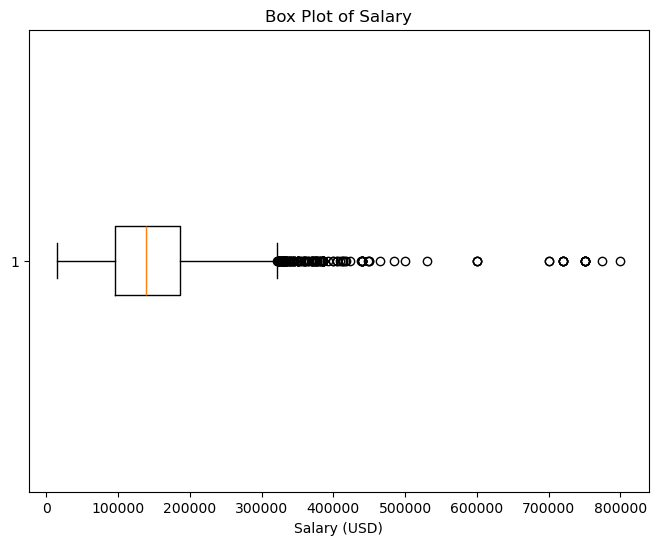

In [13]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Salary_USD'], vert=False)
plt.title('Box Plot of Salary')
plt.xlabel('Salary (USD)')
plt.show()

For categorical variables it is better to use bar plot to show their frequencies:

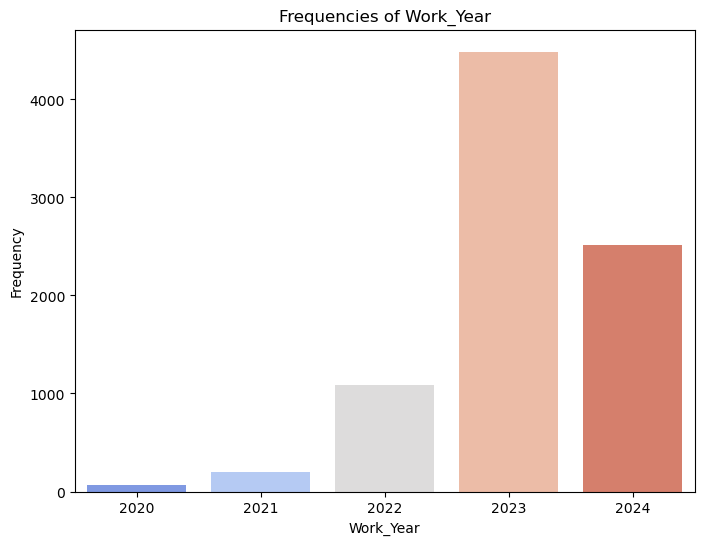

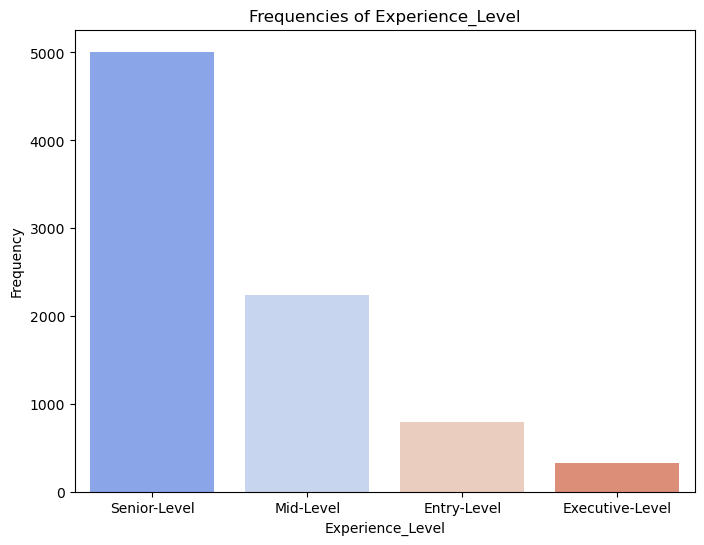

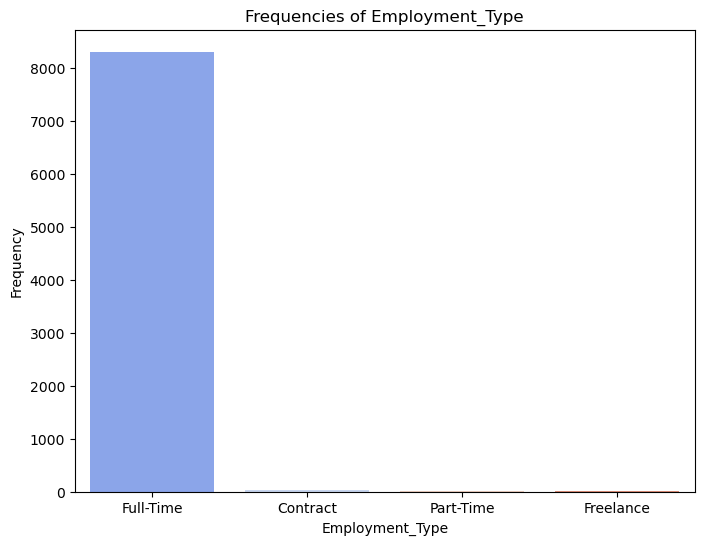

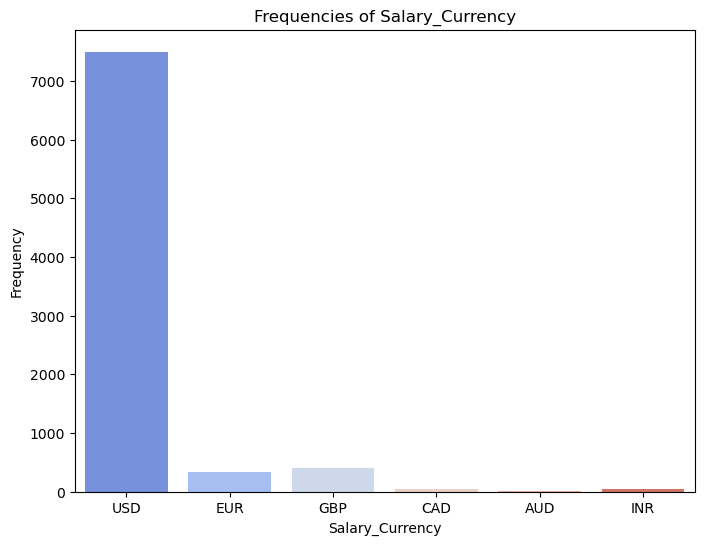

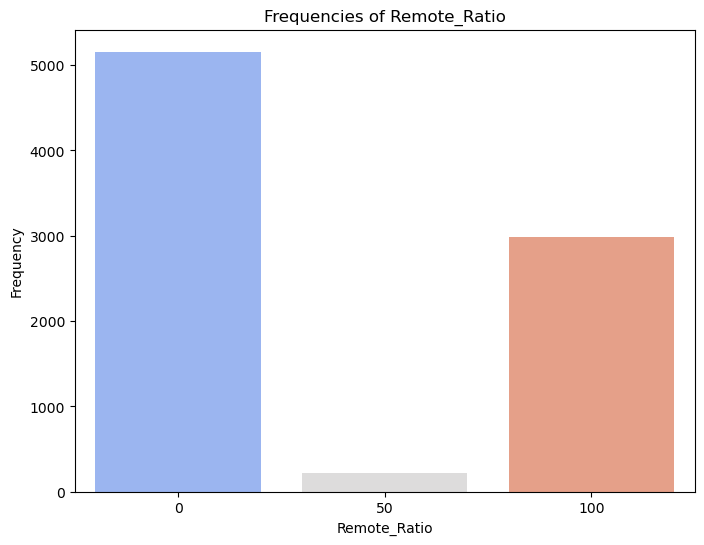

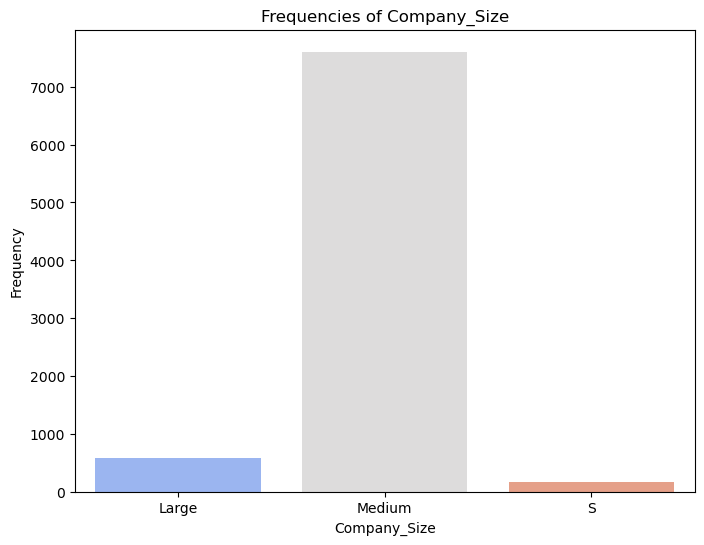

In [14]:
import seaborn as sns

def draw_bar_plot(column):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column, palette='coolwarm')
    plt.title('Frequencies of ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
for c in df.drop(columns = ['Job_Title', 'Salary', 'Salary_USD']):
    draw_bar_plot(c)  


We use the scatter plot to see the relationship between salary and other variables:

c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

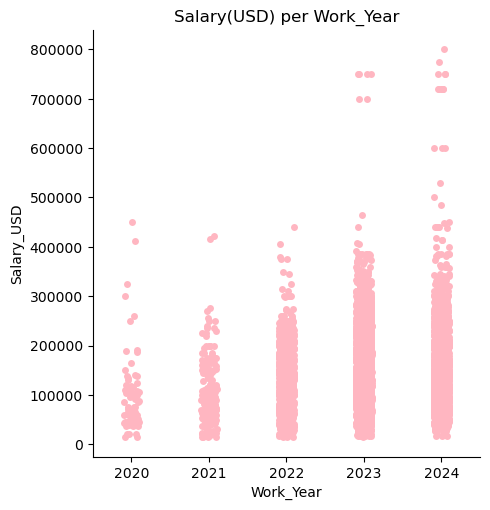

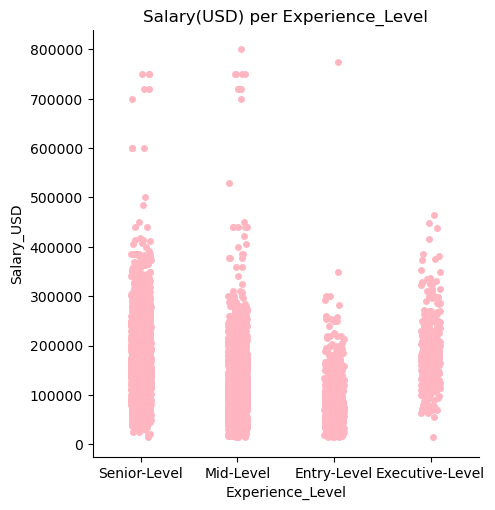

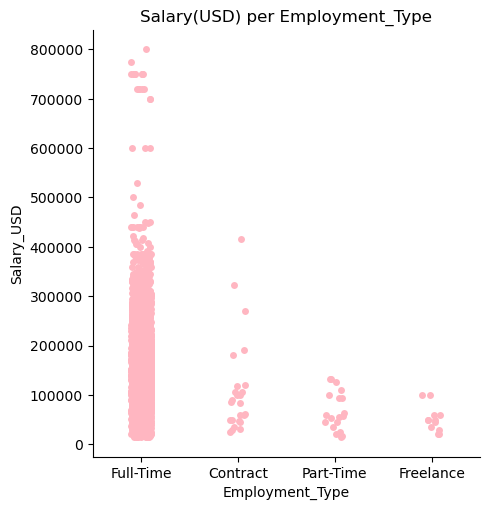

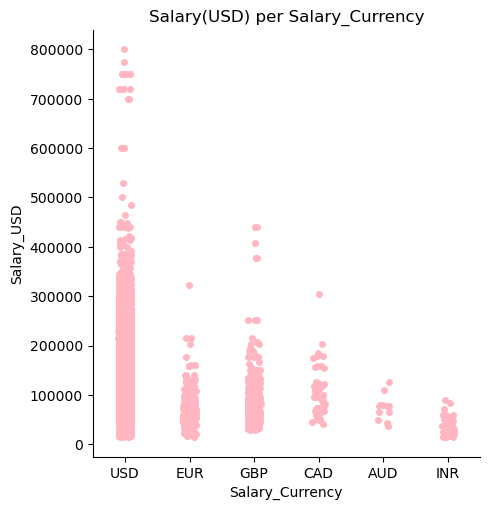

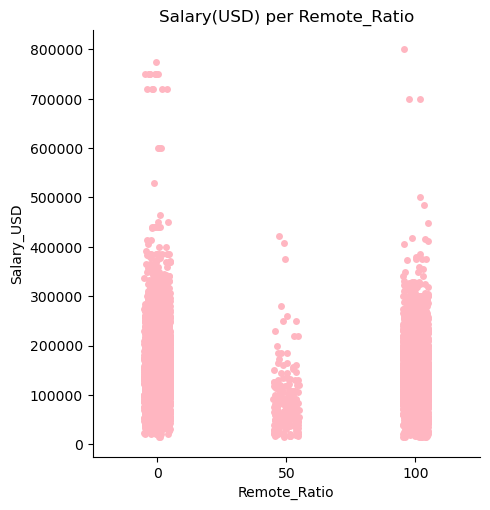

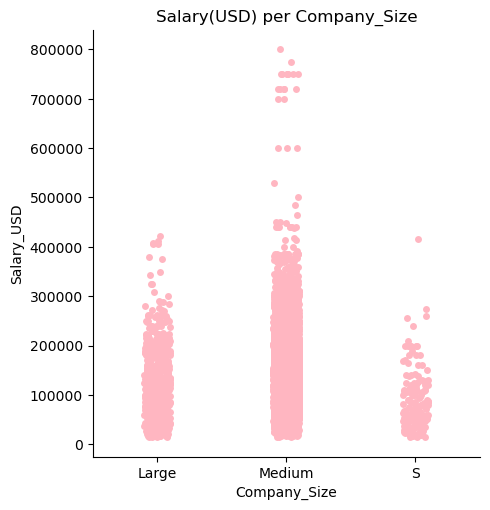

In [15]:
def scatter_plot(column):
    sns.catplot(data=df, x=column, y="Salary_USD", color="lightpink")
    plt.title('Salary(USD) per ' + column)
    
for column in df.drop(columns = ['Job_Title', 'Salary', 'Salary_USD']):
    scatter_plot(column)   

As you can see, in years 2023 and 2024, we have the most employees with the highest paid salaries. whereas in 2020, we have the least amount of employees with the lowest salaries. As for experience level, senior level has the highest paid salary and entry level has the lowest which is expected. Employees that are full-time and are paid in USD, also have the highest pais salaries. For remote ratio, there is not really a difference of salaries between those who work %100 remote and those who don't. And finally, medium sized companies have the largest amount of workers and pay the most.

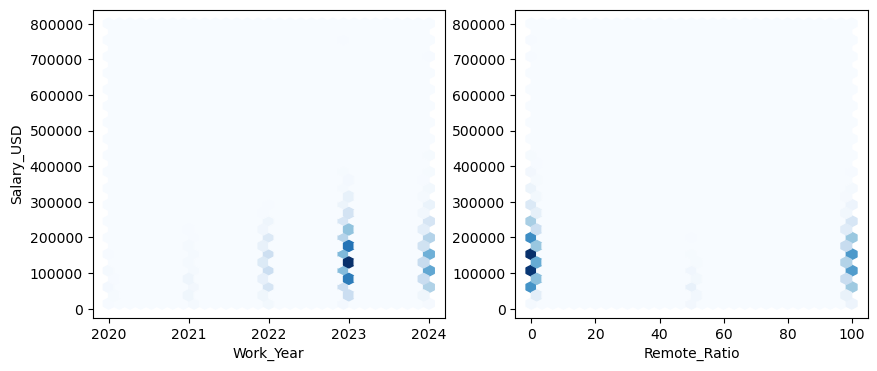

In [16]:

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hexbin(df["Work_Year"], df['Salary_USD'], gridsize=30, cmap='Blues')
plt.ylabel('Salary_USD')
plt.xlabel('Work_Year')
plt.subplot(1, 2, 2)
plt.hexbin(df["Remote_Ratio"], df['Salary_USD'], gridsize=30, cmap='Blues')
plt.xlabel('Remote_Ratio')
plt.show()



Hexbin plot is another useful reperesentation of data that allows us to see the density of data more clearly. Here you can see that the majority of employees work in 2023 and are paid around 100000 to 300000 USD. Also the majority of employees don't work from home and are paid around 50000 to 300000 USD.

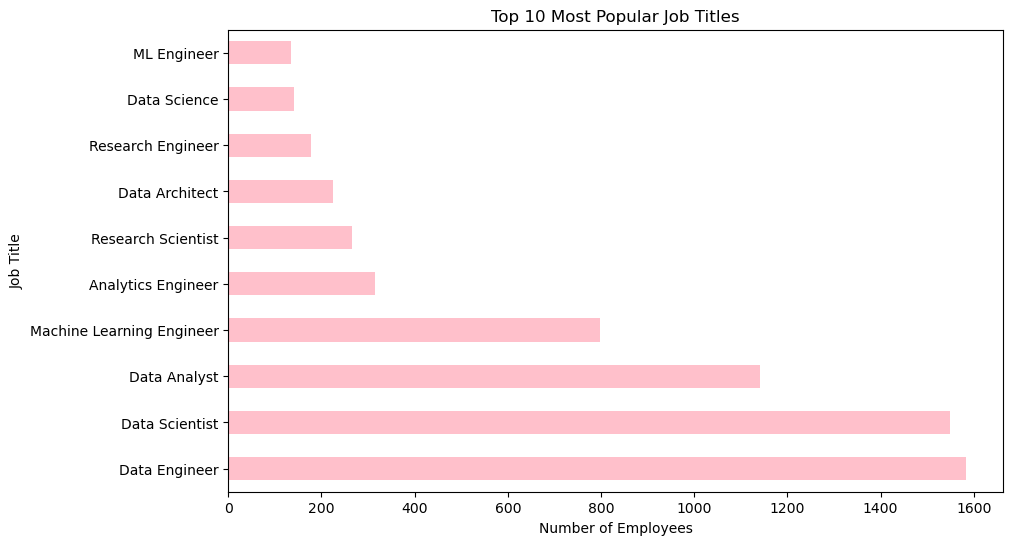

In [17]:
import matplotlib.pyplot as plt

top_job_titles = df['Job_Title'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_job_titles.plot(kind='barh', color='pink')
plt.title('Top 10 Most Popular Job Titles')
plt.xlabel('Number of Employees')
plt.ylabel('Job Title')
plt.show()

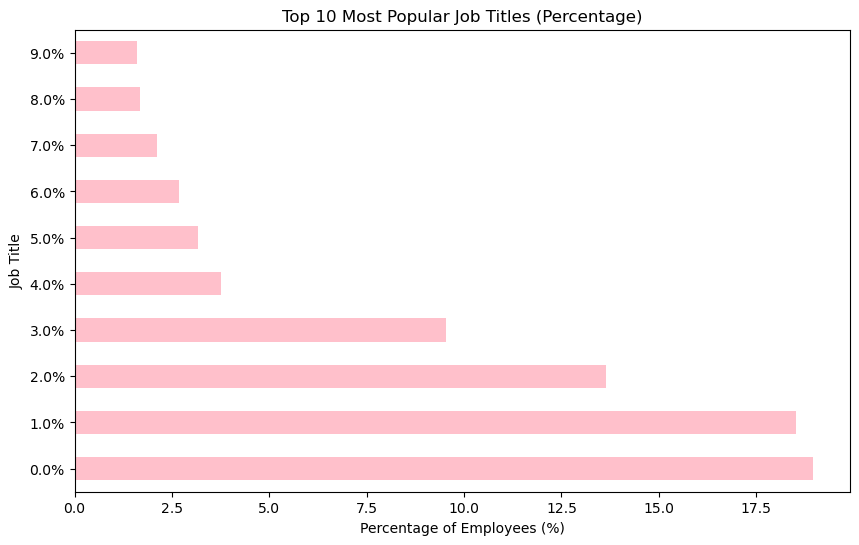

In [18]:
import matplotlib.pyplot as plt

top_job_titles = df['Job_Title'].value_counts().head(10)

# Calculate total number of employees
total_employees = len(df)

# Calculate percentages
percentages = (top_job_titles / total_employees) * 100

plt.figure(figsize=(10, 6))
percentages.plot(kind='barh', color='pink')  # Use percentages for plotting
plt.title('Top 10 Most Popular Job Titles (Percentage)')
plt.xlabel('Percentage of Employees (%)')
plt.ylabel('Job Title')

# Format y-axis labels to display percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x:.1f}%'))  # Show percentages with 1 decimal place

plt.show()


Data scientists are listed as the highest earners, followed by data engineers, machine learning engineers, and analytics engineers.

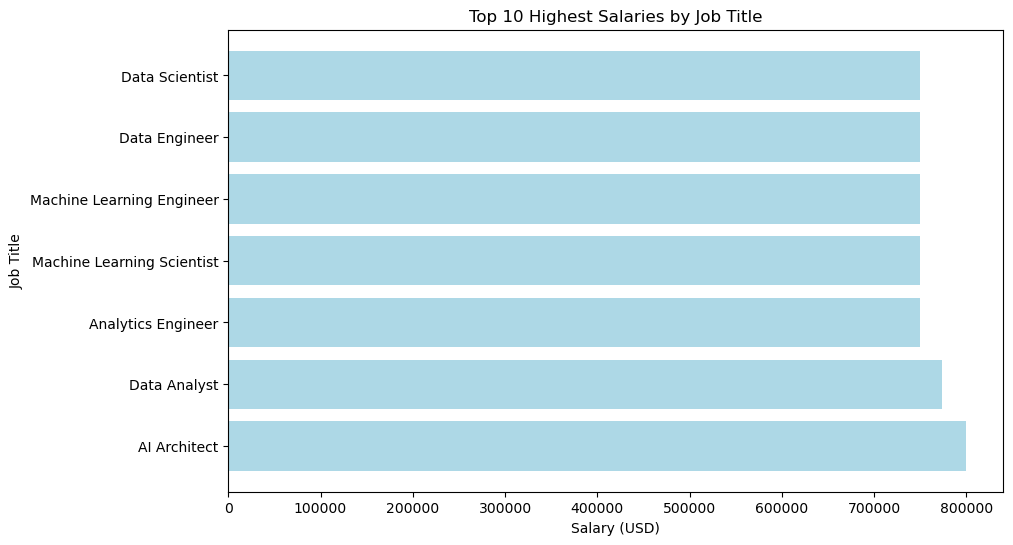

In [19]:
top_salaries = df.nlargest(10, 'Salary_USD')

plt.figure(figsize=(10, 6))
plt.barh(top_salaries['Job_Title'], top_salaries['Salary_USD'], color='lightblue')
plt.xlabel('Salary (USD)')
plt.title('Top 10 Highest Salaries by Job Title')
plt.ylabel('Job Title')
plt.show()

It appears that salary based on job is almost uniform, but data analysts and AI Architect somhow gets more.

In [21]:
pip install --upgrade matplotlib


   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.7 MB 330.3 kB/s eta 0:00:24
   ---------------------------------------- 0.0/7.7 MB 281.8 kB/s eta 0:00:28
   ---------------------------------------- 0.1/7.7 MB 365.7 kB/s eta 0:00:21
   ---------------------------------------- 0.1/7.7 MB 438.1 kB/s eta 0:00:18
    --------------------------------------- 0.1/7.7 MB 481.4 kB/s eta 0:00:16
    --------------------------------------- 0.2/7.7 MB 510.2 kB/s eta 0:00:15
   - -------------------------------------- 0.2/7.7 MB 562.0 kB/s eta 0:00:14
   - -------------------------------------- 0.2/7.7 MB 573.4 kB/s eta 0:00:13
   - -------------------------------------- 0.3/7.7 MB 562.4 kB/s eta 0:00:14
   - -------------------------------------- 0.3/7.7 MB 589.5 kB/s eta 0:00:13
   - -------------------------------------- 0.3/7.7 MB 596.5 kB/s eta 0:00:13
   -

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\users\\asus\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.



In below, we grouped data by experience level and year, and ploted it based on average salary.

<Figure size 1200x800 with 0 Axes>

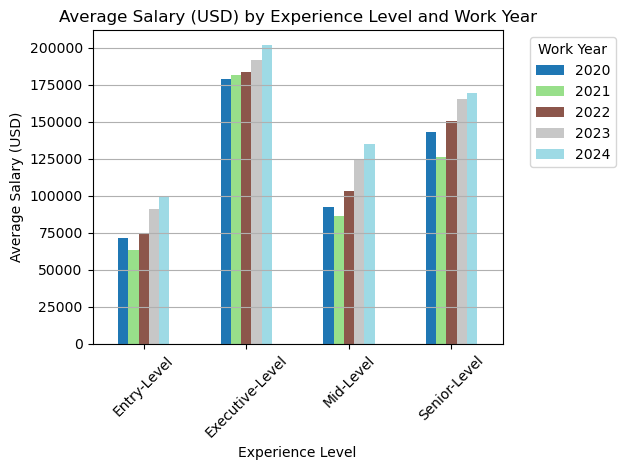

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


grouped_data = df.groupby(['Experience_Level', 'Work_Year'])['Salary_USD'].mean().unstack()

# Get experience levels (categories)
experience_levels = grouped_data.columns.tolist()

# Create the plot
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar', colormap='tab20')  
plt.title('Average Salary (USD) by Experience Level and Work Year')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')

plt.legend(title='Work Year', loc='upper left', bbox_to_anchor=(1.05, 1))  

plt.xticks(rotation=45)
plt.grid(axis='y')  

plt.tight_layout()  
plt.show()



Salary Trends: It appears that average salary generally increases with experience level, in every experience level. and there might also be an upward trend in salary over the work years shown in the graph. However, in 2021 year, in Entry, Midlevel and especially senior level ,we had a downward trend which can have meanings.

<Figure size 1200x800 with 0 Axes>

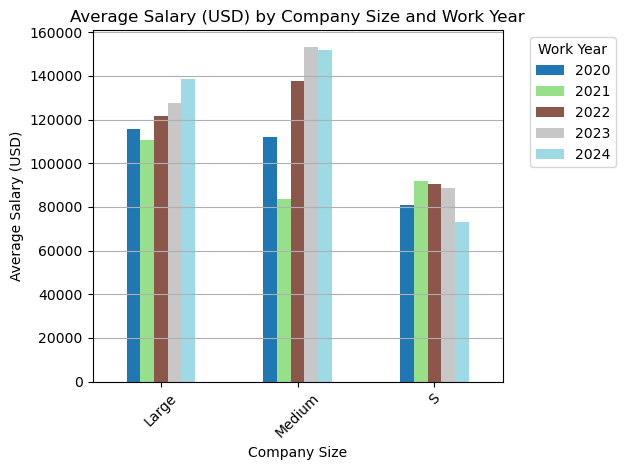

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


grouped_data = df.groupby(['Company_Size', 'Work_Year'])['Salary_USD'].mean().unstack()

experience_levels = grouped_data.columns.tolist()

plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar', colormap='tab20')  
plt.title('Average Salary (USD) by Company Size and Work Year')
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')

plt.legend(title='Work Year', loc='upper left', bbox_to_anchor=(1.05, 1))  

plt.xticks(rotation=45)
plt.grid(axis='y')  

plt.tight_layout()  
plt.show()

Some trends we see in this plot:

#### Average salary trend across company sizes:
The graph seems to show that in large companies, the average salary has generally increased over the years (except for a decrease in 2021, which may have been due to the COVID-19 pandemic). However, in medium-sized companies, the decrease in salary in 2021 was much more noticeable. Perhaps this could be interpreted as meaning that employees in these companies were the most affected by the pandemic. However, in small companies, the average salary trend has not been upward over the years and has been decreasing since 2021, which is very interesting. This situation is even harder given the inflation rate.

Here are some additional points to consider:

The graph only shows average salary, and does not account for other factors that can affect salary, such as job title, location, and experience level.

#### Salary gap between company sizes:
It seems that the average salary is higher in small companies than in large companies and then smaller.

<Figure size 1200x800 with 0 Axes>

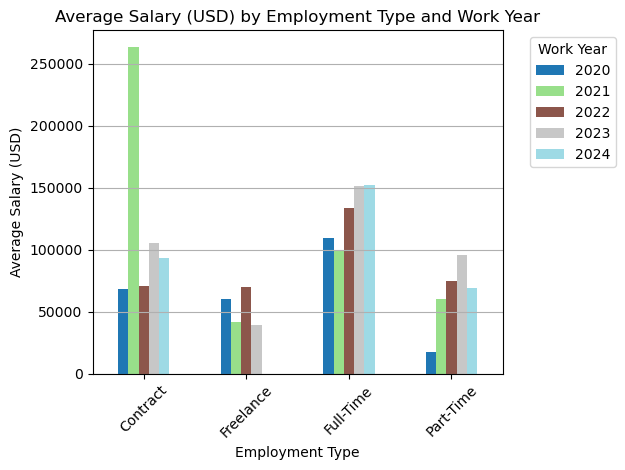

In [32]:
import pandas as pd
import matplotlib.pyplot as plt


grouped_data = df.groupby(['Employment_Type', 'Work_Year'])['Salary_USD'].mean().unstack()

experience_levels = grouped_data.columns.tolist()

plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar', colormap='tab20')  
plt.title('Average Salary (USD) by Employment Type and Work Year')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')

plt.legend(title='Work Year', loc='upper left', bbox_to_anchor=(1.05, 1))  

plt.xticks(rotation=45)
plt.grid(axis='y')  

plt.tight_layout()  
plt.show()

The graph seems to show that for full-time employees, there is a generally upward trend over the years (except for a decrease in 2021, which, as mentioned in the previous category, is likely due to COVID-19). However, for part-time employees, we see a very noticeable increase in performance from 2020 to 2021. This could also have an interesting meaning, but it has noticeably decreased in 2024 compared to the upward trend in previous years.

An interesting point is that contract employees experienced a skyrocketing increase in average salary in 2021!

And as for freelancers, there is no clear and consistent trend over the years.

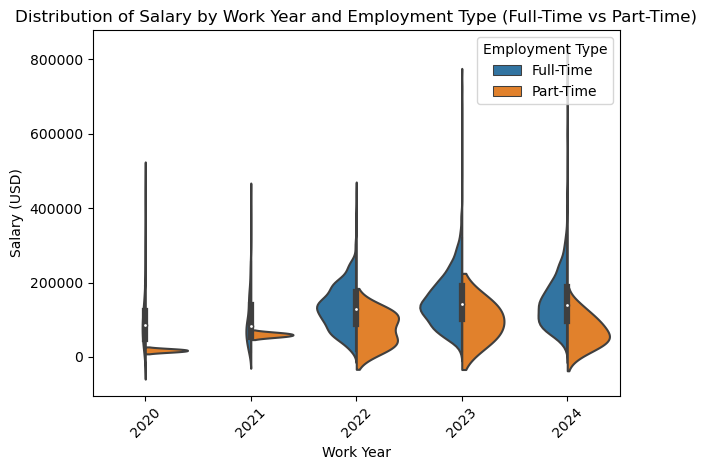

In [44]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df_filtered = df[df['Employment_Type'].isin(['Full-Time', 'Part-Time'])]

sns.violinplot(
    y="Salary_USD",
    x="Work_Year",
    hue="Employment_Type",
    showmeans=True,  
    split=True,      
    data=df_filtered
)

plt.title("Distribution of Salary by Work Year and Employment Type (Full-Time vs Part-Time)")
plt.xlabel("Work Year")
plt.ylabel("Salary (USD)")
plt.legend(title="Employment Type")
plt.xticks(rotation=45)  
plt.tight_layout()

plt.show()


General Trends:

Salary Increase Over Time: The violin plots show a general upward trend in salary across work years for both full-time and part-time employees. This suggests that employees tend to earn more as they gain experience (indicated by work year).
Higher Full-Time Salary: The overall distribution of full-time salaries appears to be higher than that of part-time salaries across all work years. The wider spread of the full-time violin also suggests greater salary variation within the full-time category.
Year-to-Year Variations:

While there's a general upward trend, the violin plots indicate some year-to-year variations in salary distribution. For a more precise analysis, we'd need to look at the actual data or calculate statistics like mean and median salary for each year within each employment type.
Employment Type Comparison:

The full-time violin plot seems wider throughout the years, indicating potentially greater salary variation among full-time employees compared to part-time employees. This could be due to factors like job titles, experience levels within the full-time category, or even company size variations within the data set.
The mean salary (represented by the small circles within the violins) appears to be consistently higher for full-time employees across all work years.

instead, in 2020 and 2021 year for part-time employees we see a meaningfull peak. in contrast to full-time employees which have wide ranges of salaries, a certain salary for part-timers are considered.

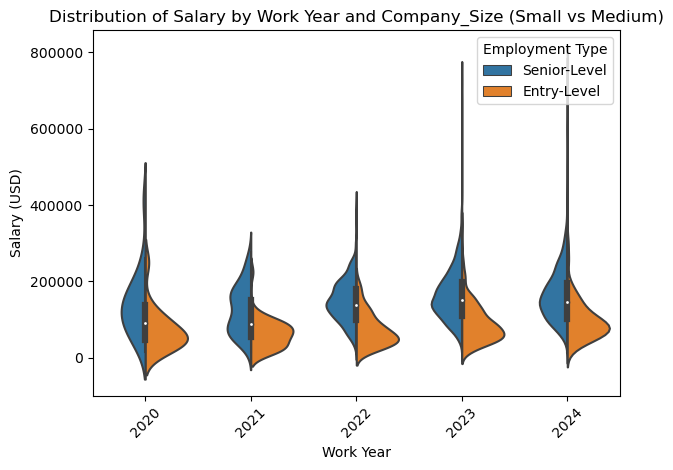

In [46]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df_filtered = df[df['Experience_Level'].isin(['Entry-Level', 'Senior-Level'])]

sns.violinplot(
    y="Salary_USD",
    x="Work_Year",
    hue="Experience_Level",
    showmeans=True,  
    split=True,      
    data=df_filtered
)

plt.title("Distribution of Salary by Work Year and Company_Size (Small vs Medium)")
plt.xlabel("Work Year")
plt.ylabel("Salary (USD)")
plt.legend(title="Employment Type")
plt.xticks(rotation=45)  
plt.tight_layout()

plt.show()


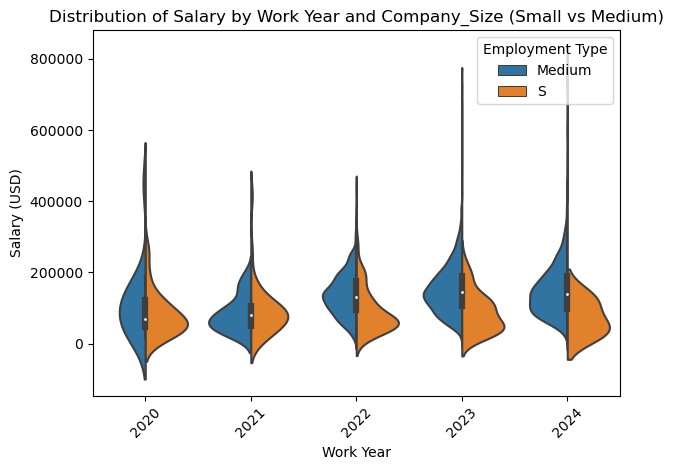

In [45]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df_filtered = df[df['Company_Size'].isin(['S', 'Medium'])]

sns.violinplot(
    y="Salary_USD",
    x="Work_Year",
    hue="Company_Size",
    showmeans=True,  
    split=True,      
    data=df_filtered
)

plt.title("Distribution of Salary by Work Year and Company_Size (Small vs Medium)")
plt.xlabel("Work Year")
plt.ylabel("Salary (USD)")
plt.legend(title="Employment Type")
plt.xticks(rotation=45)  
plt.tight_layout()

plt.show()
